## Sentiment analysis imdb

In [1]:
from tensorflow.keras.datasets import imdb

In [56]:
(Xdata_train, ydata_train), (Xdata_test, ydata_test) = imdb.load_data(num_words=10000)

In [57]:
#word indexes
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [58]:
print(Xdata_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


#### We need to apply an offset=-3, due the 0,1 and 2 are reserved numbers for 'padding','start of sequence' and 'unknown'

In [59]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in Xdata_train[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [60]:
print(ydata_train[0])

1


## Data processing

In [8]:
import numpy as np

#Vectorize the reviews

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
    

In [10]:
a=np.zeros(15)
print("original array:\t\t",a)
a[[0,3,5,7,9]]=1.
print('modified array:\t',a)

original array:		 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
modified array:	 [1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.]


In [63]:
#Vectorized data
X_train= vectorize_sequences(Xdata_train,10000)
X_test= vectorize_sequences(Xdata_test,10000)

In [64]:
print('original array:\t',Xdata_train[0][0:15])
print('modified array:\t',X_train[0][0:15])

original array:	 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4]
modified array:	 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.]


## Data split

In [65]:
from sklearn.model_selection import train_test_split

X_test,X_val,y_test,y_val=train_test_split(X_test,ydata_test,test_size=0.5,random_state=42)

In [67]:
y_train=ydata_train
print('X_train_vector shape:',X_train.shape) 
print('X_test_vector shape:',X_test.shape)
print('X_val shape:',X_val.shape)
print('y_test shape:',y_test.shape)
print('y_val shape:',y_val.shape)

X_train_vector shape: (25000, 10000)
X_test_vector shape: (12500, 10000)
X_val shape: (12500, 10000)
y_test shape: (12500,)
y_val shape: (12500,)


## Building a NNA

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [288]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

/Users/ginovalverde/projects/deep_learning/dlenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy','Precision']
              )

In [ ]:
history=model.fit(X_train,y_train,
                  epochs=40,
                  validation_data=(X_val,y_val)
                  )

Epoch 1/40


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_36" is incompatible with the layer: expected axis -1 of input shape to have value 10000, but received input with shape (None, 9477)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 9477), dtype=int64)
  • training=True
  • mask=None

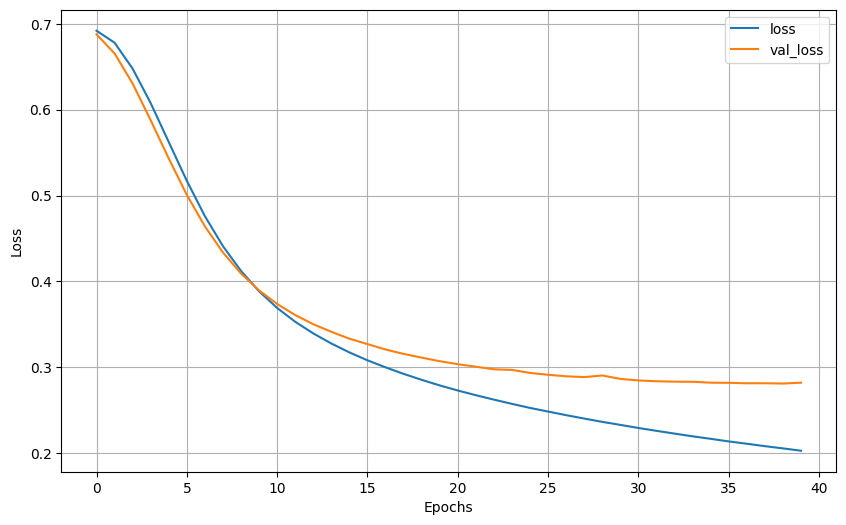

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss','val_loss']].plot(figsize=(10,6))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


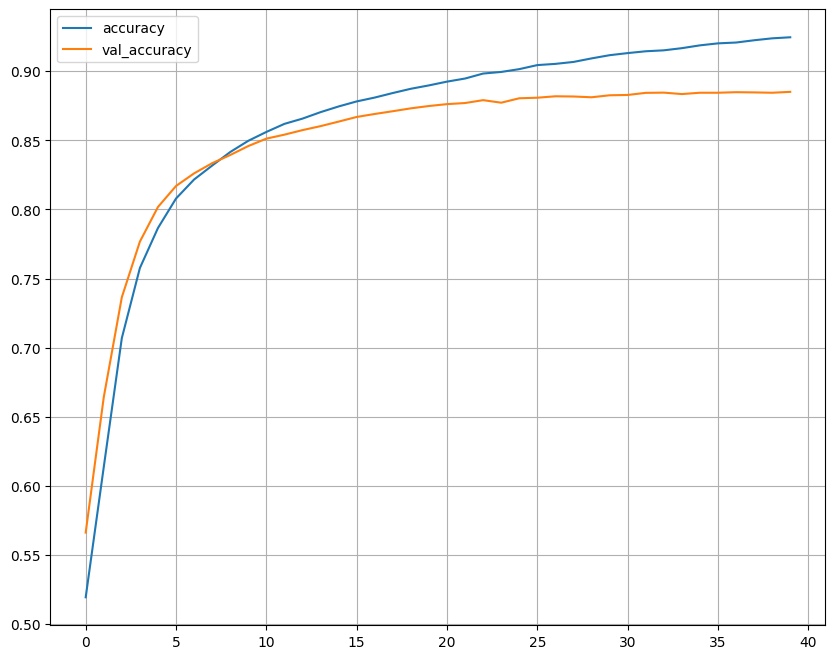

In [83]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot(figsize=(10,8))
plt.grid(True)
xlabel=('Epochs')
ylabel=('Acurracy')
plt.show()

In [84]:
print('accuracy:',history.history['accuracy'][-1])
print('val_accuracy:',history.history['val_accuracy'][-1])

accuracy: 0.9245200157165527
val_accuracy: 0.8850399851799011


## Model evaluation

In [85]:
test_loss,test_acc,test_prec=model.evaluate(X_test,y_test)

391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - Precision: 0.8825 - accuracy: 0.8773 - loss: 0.2974


## Other data processing

In [244]:
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [245]:
word_index = imdb.get_word_index()

In [246]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
' '.join([reverse_word_index.get(i - 3, '({})'.format(i)) for i in test_data[0]])

"(1) please give this one a miss br br (2) (2) and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite (2) so all you madison fans give this a miss"

## Data Prep

In [247]:
X_train_prep=[]
X_test_prep=[]

In [248]:
for review in train_data:
    X_train_prep.append(' '.join([reverse_word_index.get(i - 3, "") for i in review]))

In [249]:
X_train_prep[0]

" this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the

In [250]:
for review in train_data:
    X_test_prep.append(
        ' '.join([reverse_word_index.get(i - 3, "") for i in review]))

In [251]:
X_test_prep[0]

" this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the

In [252]:
y_train=train_labels
y_test=test_labels

In [253]:
X_test_prep,X_val_prep,y_test,y_val=train_test_split(X_test_prep,y_test,test_size=0.5)

In [254]:
print('X_train_prep shape:',np.array(X_train_prep).shape)
print('X_test_prep shape:',np.array(X_test_prep).shape)
print('X_val shape:',np.array(X_val_prep).shape)

X_train_prep shape: (25000,)
X_test_prep shape: (12500,)
X_val shape: (12500,)


## Vectorizer

In [256]:
from sklearn.feature_extraction.text import CountVectorizer

In [280]:
vectorizer=CountVectorizer(stop_words='english',max_features=10000)
X_train=vectorizer.fit_transform(X_train_prep)

In [281]:
X_train=X_train.toarray()

In [282]:
pd.DataFrame(X_train,columns=[vectorizer.get_feature_names_out()])

,00,000,10,100,1000,101,11,12,13,13th,14,15,150,16,17,18,18th,19,1920s,1930,1930s,1931,1932,1933,1934,1936,1938,1939,1940,1940s,1941,1942,1943,1944,1945,1946,1948,1949,1950,1950s,...,yawn,yeah,year,yearning,years,yell,yelling,yellow,yells,yep,yes,yesterday,yeti,yokai,york,young,younger,youngest,youngsters,youth,youthful,youtube,zabriskie,zane,zany,zatoichi,zealand,zelah,zero,zeta,zhang,zizek,zodiac,zombi,zombie,zombies,zone,zoom,zorro,zu
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [283]:
X_test=vectorizer.transform(X_test_prep)
X_test=X_test.toarray()

In [270]:
X_val=vectorizer.transform(X_val_prep)
X_val=X_val.toarray()

In [284]:
from tensorflow.keras import models
from tensorflow.keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(X_train.shape[1],)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

/Users/ginovalverde/projects/deep_learning/dlenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 16)             │       151,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,937 (593.50 KB)

 Trainable params: 151,937 (593.50 KB)

 Non-trainable params: 0 (0.00 B)

In [285]:
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import Precision

model.compile(
    optimizer=optimizers.SGD(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy',Precision()]
    )

In [286]:
history=model.fit(X_train,y_train,  
                epochs=30,  
                validation_data=(X_val,y_val)
)

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5103 - loss: 0.6919 - precision_16: 0.5031 - val_accuracy: 0.4978 - val_loss: 0.6941 - val_precision_16: 0.4979
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5631 - loss: 0.6863 - precision_16: 0.5508 - val_accuracy: 0.4919 - val_loss: 0.6953 - val_precision_16: 0.4927
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6064 - loss: 0.6789 - precision_16: 0.5918 - val_accuracy: 0.4938 - val_loss: 0.6975 - val_precision_16: 0.4941
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6469 - loss: 0.6676 - precision_16: 0.6265 - val_accuracy: 0.4940 - val_loss: 0.7012 - val_precision_16: 0.4942
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6821 - loss: 0.6520 - precision_16: 0.6611 - val_accuracy: 0.4968 - val_loss: 0.7064 - val_precision_16: 0.4966
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7156 - loss: 0.6324 - precision_16: 0.6909 -

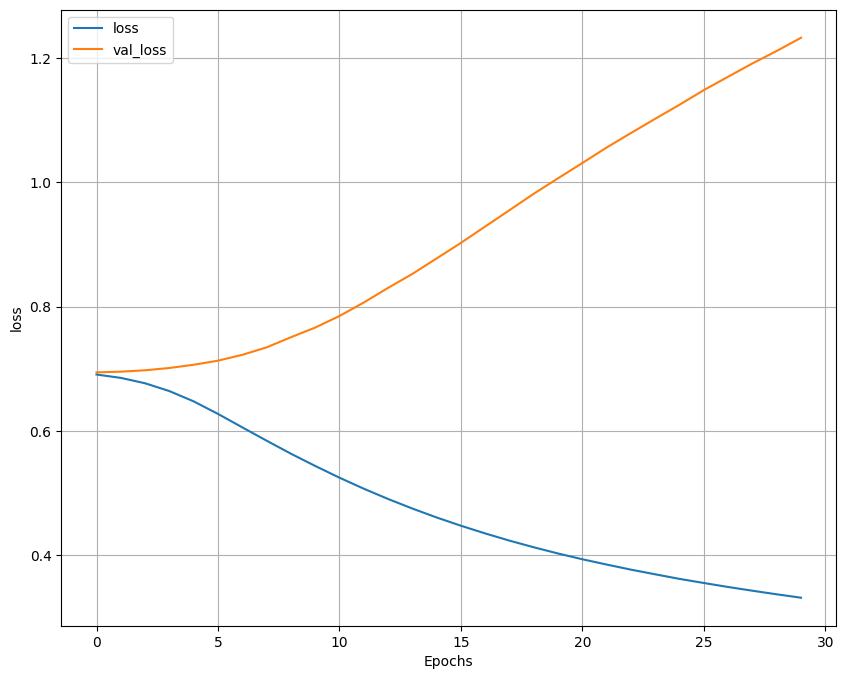

In [287]:
pd.DataFrame(history.history)[['loss','val_loss']].plot(figsize=(10,8))
plt.grid(True)
plt.xlabel ('Epochs')
plt.ylabel('loss')
plt.show()